In [141]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from numba import njit


# Ex.1: The stock market (Q1)

In [151]:
def stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bull):
            extract = 0
        if((random_num>p_bull) & (random_num<=p_bull+p_bear)):
            extract = 1
        if((random_num>p_bull+p_bear)):
            extract = 2
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bear):
            extract = 1
        if((random_num>p_bear) & (random_num<=p_bull+p_bear)):
            extract = 0
        if((random_num>p_bull+p_bear)):
            extract = 2
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_stagnant):
            extract = 2
        if((random_num>p_stagnant) & (random_num<=p_stagnant+p_bear)):
            extract = 0
        if((random_num>p_stagnant+p_bear)):
            extract = 1
    
    return extract 

def Markov_chain_stock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = int(np.random.uniform(0,3))
    chain_frac[0,first_extract] = 1
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock

@njit
def c_stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bull):
            extract = 0
        if((random_num>p_bull) & (random_num<=p_bull+p_bear)):
            extract = 1
        if((random_num>p_bull+p_bear)):
            extract = 2
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_bear):
            extract = 1
        if((random_num>p_bear) & (random_num<=p_bull+p_bear)):
            extract = 0
        if((random_num>p_bull+p_bear)):
            extract = 2
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
        # extract a random number to compare:
        random_num = np.random.uniform(0,1)
        
        if(random_num<=p_stagnant):
            extract = 2
        if((random_num>p_stagnant) & (random_num<=p_stagnant+p_bear)):
            extract = 0
        if((random_num>p_stagnant+p_bear)):
            extract = 1
    
    return extract 

@njit
def c_MCstock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = int(np.random.uniform(0,3))
    chain_frac[0,first_extract] = 1
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = c_stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock

In [154]:
N = 100000
%timeit frac_bull,frac_bear,frac_stag,initial_stock = Markov_chain_stock(N)

36.3 s ± 2.52 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'Fraction of stock market states: Bear market as init')

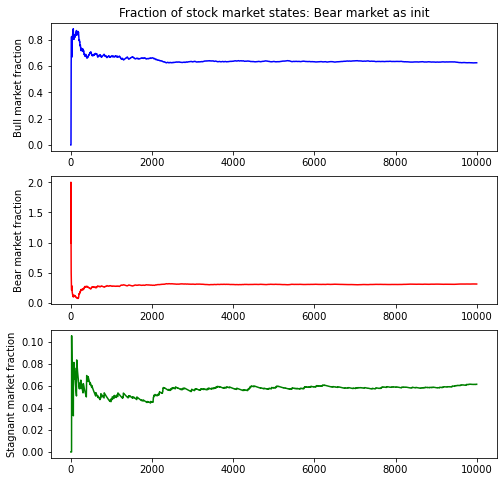

In [155]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,8))

ax[0].plot(frac_bull,color='blue')
ax[1].plot(frac_bear,color='red')
ax[2].plot(frac_stag,color='green')
    
ax[0].set_ylabel('Bull market fraction')
ax[1].set_ylabel('Bear market fraction')
ax[2].set_ylabel('Stagnant market fraction')

ax[0].set_title('Fraction of stock market states: %s market as init'%initial_stock)

In [158]:
# now import numba and try:
%timeit frac_bull,frac_bear,frac_stag,initial_stock = c_MCstock(N)

45.4 s ± 3.74 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'Fraction of stock market states: Bear market as init')

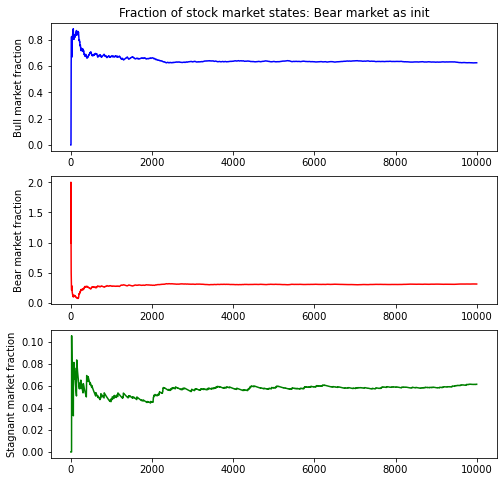

In [157]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,8))

ax[0].plot(frac_bull,color='blue')
ax[1].plot(frac_bear,color='red')
ax[2].plot(frac_stag,color='green')
    
ax[0].set_ylabel('Bull market fraction')
ax[1].set_ylabel('Bear market fraction')
ax[2].set_ylabel('Stagnant market fraction')

ax[0].set_title('Fraction of stock market states: %s market as init'%initial_stock)

# Stuff

In [143]:
def stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
    # extract a random number to compare:
    extract = np.random.choice(3,1,p=[p_bull,p_bear,p_stagnant])[0]
    
    return extract

def Markov_chain_stock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = np.random.choice(3,1)[0]
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    chain_frac[0,first_extract] = 1
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock
        
@njit
def c_stock_market(init):
    '''0: Bull market
       1: Bear market
       2: Stagnant market'''
    
    if(init==0):
        p_bull = 0.9
        p_bear = 0.075
        p_stagnant = 0.025
        
    if(init==1):
        p_bull = 0.15
        p_bear = 0.8
        p_stagnant = 0.05
    
    if(init==2):    
        p_bull = 0.25
        p_bear = 0.25
        p_stagnant = 0.5
        
    # extract a random number to compare:
    extract = np.random.choice(3,1,p=[p_bull,p_bear,p_stagnant])[0]
    
    return extract  
        
@njit
def c_MCstock(N_samples):
    # define the chain to be filled:
    chain_frac = np.zeros((N_samples,3))
    
    frac_bull = np.zeros(N_samples)
    frac_bear = np.zeros(N_samples)
    frac_stag = np.zeros(N_samples)
    
    #extract the first random state:
    first_extract = np.random.choice(3,1)[0]
    
    if(first_extract==0):
        initial_stock = 'Bull'
    
    if(first_extract==1):
        initial_stock = 'Bear'
    
    if(first_extract==2):
        initial_stock = 'Stagnant'
    
    chain_frac[0,first_extract] = 1
    
    frac_bull[0] = np.sum(chain_frac[:,0])
    frac_bear[0] = np.sum(chain_frac[:,1])
    frac_stag[0] = np.sum(chain_frac[:,2])
    
    last_extract = first_extract
    
    # run the algorithm N times
    for i in range(1,N_samples):
        
        extracted_market = c_stock_market(last_extract)
        
        chain_frac[i,extracted_market] = 1
        last_extract = extracted_market
        
        frac_bull[i] = np.sum(chain_frac[:,0])/i
        frac_bear[i] = np.sum(chain_frac[:,1])/i
        frac_stag[i] = np.sum(chain_frac[:,2])/i
        
    return frac_bull,frac_bear,frac_stag,initial_stock